<a href="https://colab.research.google.com/github/GundekariYeshashwini/GENERATIVE_AI_2025/blob/main/2023_W9_A9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1678 - loss: 2.2921 - val_accuracy: 0.1811 - val_loss: 2.2829
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1842 - loss: 2.2817 - val_accuracy: 0.2000 - val_loss: 2.2719
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2022 - loss: 2.2716 - val_accuracy: 0.2199 - val_loss: 2.2605
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2191 - loss: 2.2607 - val_accuracy: 0.2362 - val_loss: 2.2488
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2369 - loss: 2.2491 - val_accuracy: 0.2501 - val_loss: 2.2367
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2538 - loss: 2.2366 - val_accuracy: 0.2631 - val_loss: 2.2240
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2654 - loss: 2.2248 - val_accuracy: 0.2793 - val_loss: 2.2108
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2794 - loss: 2.2112 - val_accuracy: 0.

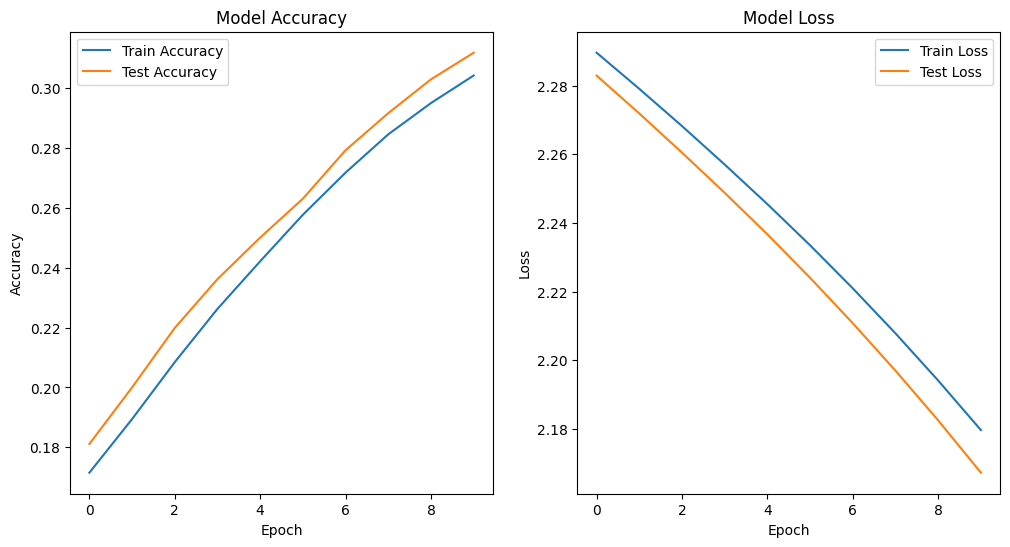

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1174 - loss: 2.3166 - val_accuracy: 0.1421 - val_loss: 2.2952
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1505 - loss: 2.2822 - val_accuracy: 0.1766 - val_loss: 2.2629
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1869 - loss: 2.2511 - val_accuracy: 0.2112 - val_loss: 2.2314
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2226 - loss: 2.2215 - val_accuracy: 0.2463 - val_loss: 2.2002
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2517 - loss: 2.1913 - val_accuracy: 0.2815 - val_loss: 2.1690
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2847 - loss: 2.1589 - val_accuracy: 0.3091 - val_loss: 2.1372
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3121 - loss: 2.1286 - val_accuracy: 0.3316 - val_loss: 2.1046
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3339 - loss: 2.0965 - val_accuracy: 0.

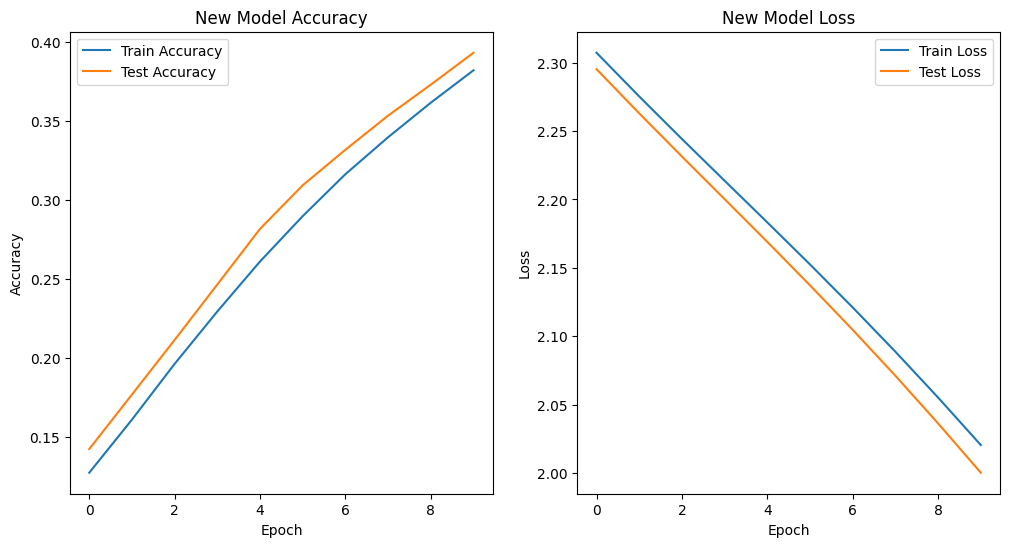

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Design the ANN model (Original Architecture)
model = Sequential()

# Flatten the 28x28 images into a vector of size 784
model.add(Flatten(input_shape=(28, 28)))

# Hidden Layer 1: 32 neurons, ReLU activation
model.add(Dense(32, activation='relu'))

# Hidden Layer 2: 32 neurons, ReLU activation
model.add(Dense(32, activation='relu'))

# Hidden Layer 3: 32 neurons, ReLU activation
model.add(Dense(32, activation='relu'))

# Output Layer: 10 neurons (one for each digit), softmax activation for classification
model.add(Dense(10, activation='softmax'))

# Step 4: Compile the model
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Step 6: Evaluate the model
train_accuracy = history.history['accuracy'][-1]
test_accuracy = model.evaluate(X_test, y_test)[1]

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Step 7: Plot the training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 8: Modify the Architecture and Tune Hyperparameters
# You can experiment by changing the number of layers, neurons, and activation functions here.
# Example: Use a different number of neurons in the hidden layers and try 'sigmoid' activation.

# New architecture (Modified)
new_model = Sequential()

# Flatten the 28x28 images into a vector of size 784
new_model.add(Flatten(input_shape=(28, 28)))

# Hidden Layer 1: 64 neurons, ReLU activation
new_model.add(Dense(64, activation='relu'))

# Hidden Layer 2: 64 neurons, ReLU activation
new_model.add(Dense(64, activation='relu'))

# Output Layer: 10 neurons (one for each digit), softmax activation for classification
new_model.add(Dense(10, activation='softmax'))

# Compile the new model
new_model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the new model
new_history = new_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the new model
new_train_accuracy = new_history.history['accuracy'][-1]
new_test_accuracy = new_model.evaluate(X_test, y_test)[1]

print(f"Modified Training Accuracy: {new_train_accuracy * 100:.2f}%")
print(f"Modified Testing Accuracy: {new_test_accuracy * 100:.2f}%")

# Plot the training history for the new architecture
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values for the new architecture
plt.subplot(1, 2, 1)
plt.plot(new_history.history['accuracy'], label='Train Accuracy')
plt.plot(new_history.history['val_accuracy'], label='Test Accuracy')
plt.title('New Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values for the new architecture
plt.subplot(1, 2, 2)
plt.plot(new_history.history['loss'], label='Train Loss')
plt.plot(new_history.history['val_loss'], label='Test Loss')
plt.title('New Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()